In [2]:
"""
Pour ce notebook entier, 
TP4 Image processing
Nathan Oliveira Da Silva ING3A
"""
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.util import random_noise

In [4]:
def egalisation(img):
    gray = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)

    # algorithme d'egalisation
    imgEgalisee = cv2.equalizeHist(gray.astype(np.uint8))
    # premier terrain position 1
    plt.subplot(1, 2, 1)
    plt.imshow(
        imgEgalisee,
        cmap="gray",
    )
    plt.title('image après égalisation')

    # deuxieme terrain position 2
    plt.subplot(1, 2, 2)
    # chargement histogramme
    plt.hist(imgEgalisee.ravel(), 256, [0, 255])
    plt.title('equalized histogram')

    plt.show()

    return imgEgalisee


In [5]:
def etirement(img):
    # algorithme d'etirement
    maximum = img.max()
    minimum = img.min()
    temp = ((img - minimum) / (maximum - minimum)) * 255

    # on change les floats en int pour afficher l'image
    imgEtiree = np.int_(temp)

    # premier terrain position 1
    plt.subplot(1, 2, 1)
    plt.imshow(
        imgEtiree,
        cmap="gray",
    )
    plt.title('image après étirement')

    # deuxieme terrain position 2
    plt.subplot(1, 2, 2)
    # chargement histogramme
    plt.hist(imgEtiree.ravel(), 256, [0, 255])
    plt.title('stretched histogram')

    plt.show()

    return imgEtiree

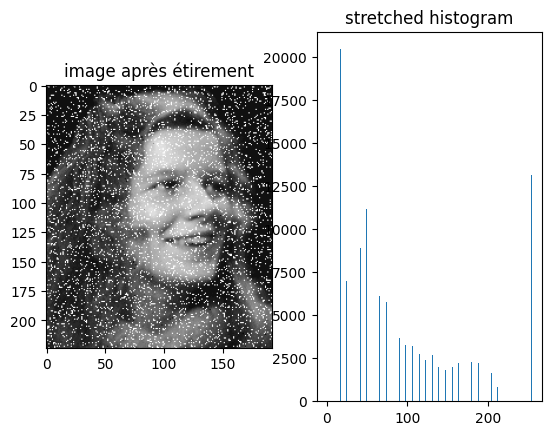

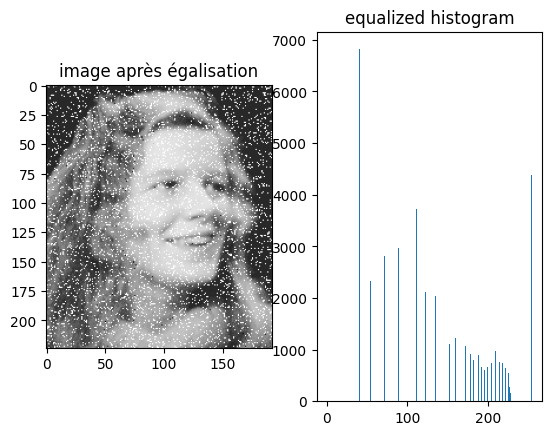

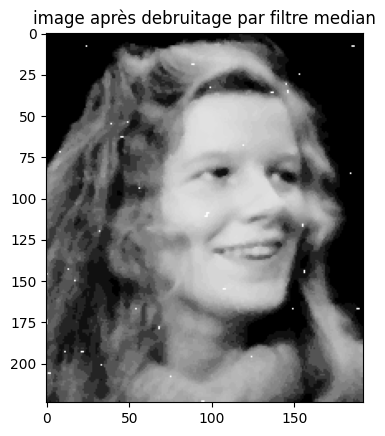

In [6]:
# filtre médian Exercice 1
def debruitageFiltreMedian(img):
    imgDebruitee = cv2.medianBlur(img.astype(np.float32),3)

    return imgDebruitee

# chargement de l'image test
img = cv2.imread('../../Images/histo_imageTest_entree.png')

imgEtiree = etirement(img)
imgEgalisee = egalisation(imgEtiree)
imgDebruitee = debruitageFiltreMedian(imgEgalisee)
# affichage image debruitee
plt.subplot(1, 1, 1)
plt.imshow(
        imgDebruitee,
        cmap="gray",
)
plt.title('image après debruitage par filtre median')
plt.show()

In [136]:
# fonction affichage 4 images Exercice 2
def affichageExercice2(imgBruitGaussien, img_BG_FiltreMoyennant,
                       imgBruitImpulsionnel, img_BI_FiltreMedian):
    # layout
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)

    # image + bruit gaussien
    plt.subplot(2, 2, 1)
    plt.imshow(
        imgBruitGaussien,
        cmap="gray",
    )
    plt.title('image + bruit gaussien')
    plt.axis('off')

    # image + bruit gaussien
    plt.subplot(2, 2, 2)
    plt.imshow(
        img_BG_FiltreMoyennant,
        cmap="gray",
    )
    plt.title('image + bruit gaussien + Filtre moyennant')
    plt.axis('off')

    # image + bruit impulsionnel
    plt.subplot(2, 2, 3)
    plt.imshow(
        imgBruitImpulsionnel,
        cmap="gray",
    )
    plt.title('image + bruit impulsionnel')
    plt.axis('off')

    # image + bruit gaussien + filtre median
    plt.subplot(2, 2, 4)
    plt.imshow(
        img_BI_FiltreMedian,
        cmap="gray",
    )
    plt.title('image + bruit gaussien + filtre median')
    plt.axis('off')

    plt.show()


In [128]:
# fonction ajoutBruitGaussien
def ajoutBruitGaussien(img):
    imgBruitee_BG = random_noise(img, mode='gaussian', mean=0, var=0.04)

    return imgBruitee_BG

In [133]:
# fonction ajoutBruitSalt&Pepper
def ajoutBruitSalt_Pepper(img):
    imgBtuireeSalt_Pepper = random_noise(img, mode='s&p')

    return imgBtuireeSalt_Pepper

In [174]:
# fonction debruitageFiltreMoyenneur
def debruitageFiltreMoyenneur(img):
    imgDebruitee = cv2.blur(img.astype(np.float32), ksize=(3, 3))

    return imgDebruitee

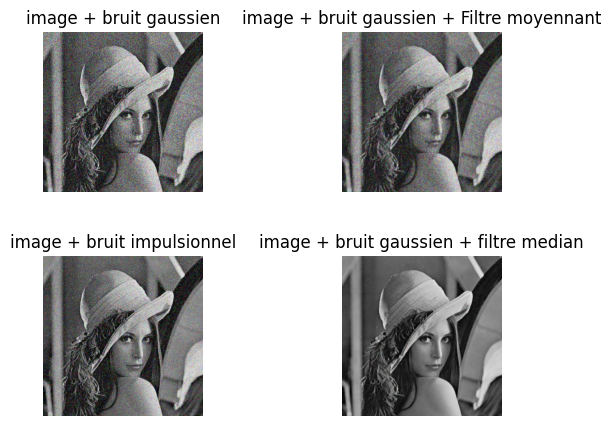

In [182]:
# Exercice 2

# chargement de l'imgage
img = cv2.imread('../../Images/lena.jpg')

imgBruitGaussien = ajoutBruitGaussien(img)
imgBruitSaltPepper = ajoutBruitSalt_Pepper(img)

imgBruitGaussien_FiltreMoyennant = debruitageFiltreMoyenneur(imgBruitGaussien)
imgBruitSaltPepper_FiltreMedian = debruitageFiltreMedian(imgBruitSaltPepper)

# resultat final TP4
affichageExercice2(imgBruitGaussien, imgBruitGaussien_FiltreMoyennant,
                   imgBruitSaltPepper, imgBruitSaltPepper_FiltreMedian)
